In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import grangercausalitytests

In [3]:
df = pd.read_csv('data/df_analise.csv').set_index('Data')
df

,Dolar,IBOVESPA,IPCA,IGPM,IGPDI,IGP10,INPC
Data,,,,,,,
fev/2010,-3.572001,1.683435,0.78,1.18,1.09,1.08,0.70
mar/2010,-1.411957,5.817783,0.52,0.94,0.63,1.10,0.71
abr/2010,-2.909296,-4.038538,0.57,0.77,0.72,0.63,0.73
mai/2010,4.957478,-6.638531,0.43,1.19,1.57,1.11,0.43
jun/2010,-1.295192,-3.348296,0.00,0.85,0.34,1.30,-0.11
...,...,...,...,...,...,...,...
ago/2024,0.295836,6.542788,-0.02,0.29,0.12,0.72,-0.14
set/2024,-3.456118,-3.079321,0.44,0.62,1.03,0.18,0.48
out/2024,6.057206,-1.595406,0.56,1.52,1.54,1.34,0.61


In [4]:
result = {}
for column in df.columns:
    if column != 'Dolar':
        result[column] = grangercausalitytests(df[['Dolar', column]], maxlag=50)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5804  , p=0.4472  , df_denom=175, df_num=1
ssr based chi2 test:   chi2=0.5904  , p=0.4423  , df=1
likelihood ratio test: chi2=0.5894  , p=0.4427  , df=1
parameter F test:         F=0.5804  , p=0.4472  , df_denom=175, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6229  , p=0.5376  , df_denom=172, df_num=2
ssr based chi2 test:   chi2=1.2821  , p=0.5267  , df=2
likelihood ratio test: chi2=1.2775  , p=0.5280  , df=2
parameter F test:         F=0.6229  , p=0.5376  , df_denom=172, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4824  , p=0.6950  , df_denom=169, df_num=3
ssr based chi2 test:   chi2=1.5071  , p=0.6806  , df=3
likelihood ratio test: chi2=1.5007  , p=0.6821  , df=3
parameter F test:         F=0.4824  , p=0.6950  , df_denom=169, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.1509  , p=0.0768  

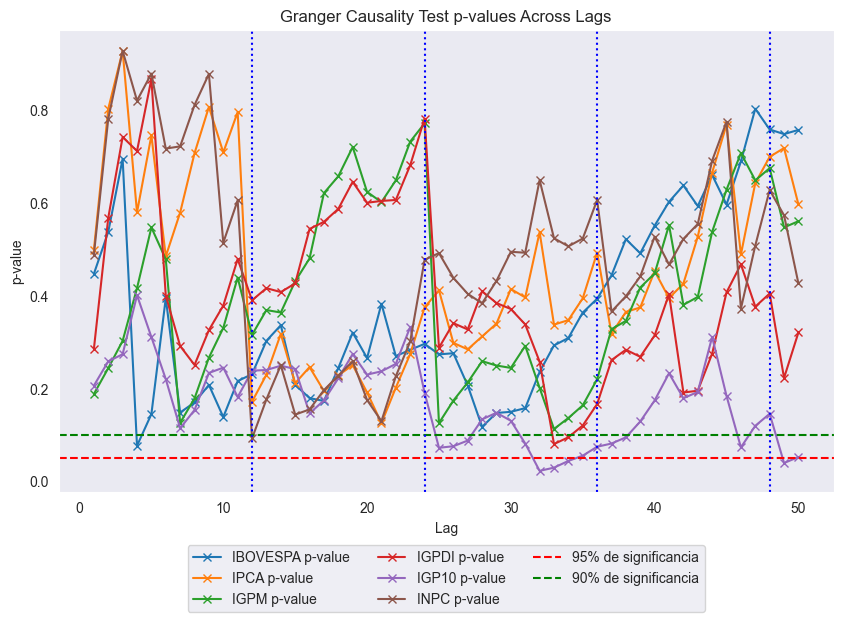

In [5]:
# Use the result variable to extract and plot p-values for each column and lag
plt.figure(figsize=(10, 6))

for column, test_result in result.items():
    # Extract p-values for each lag
    p_values = [test_result[lag][0]['ssr_ftest'][1] for lag in range(1, 51)]

    # Plot the p-values
    plt.plot(range(1, 51), p_values, marker='x', label=f'{column} p-value')

# Add significance level line
plt.axhline(y=0.05, color='r', linestyle='--', label='95% de significancia')
plt.axhline(y=0.1, color='g', linestyle='--', label='90% de significancia')

# Add vertical lines at lags 12 and 24
plt.axvline(x=12, color='b', linestyle=':')
plt.axvline(x=24, color='b', linestyle=':')
plt.axvline(x=36, color='b', linestyle=':')
plt.axvline(x=48, color='b', linestyle=':')

# Final touch for the plot
plt.title('Granger Causality Test p-values Across Lags')
plt.xlabel('Lag')
plt.ylabel('p-value')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)  # Move legend outside the plot
plt.grid()

plt.show()

In [6]:
# Extract and display conclusions based on the p-values for each lag and column
conclusions = {}

for column, test_result in result.items():
    significant_lags = [lag for lag in range(1, 51) if test_result[lag][0]['ssr_ftest'][1] < 0.05]
    conclusions[column] = {
        "significant_lags": significant_lags,
        "any_significant": len(significant_lags) > 0
    }

for column, info in conclusions.items():
    if info['any_significant']:
        print(f"{column}: Há lags significativos nos seguintes atrasos: {info['significant_lags']}")
    else:
        print(f"{column}: Nenhum lag significativo encontrado.")

IBOVESPA: Nenhum lag significativo encontrado.
IPCA: Nenhum lag significativo encontrado.
IGPM: Nenhum lag significativo encontrado.
IGPDI: Nenhum lag significativo encontrado.
IGP10: Há lags significativos nos seguintes atrasos: [32, 33, 34, 49]
INPC: Nenhum lag significativo encontrado.


In [7]:
# Extract and display conclusions based on the p-values for each lag and column
conclusions = {}

for column, test_result in result.items():
    significant_lags = [lag for lag in range(1, 51) if test_result[lag][0]['ssr_ftest'][1] < 0.1]
    conclusions[column] = {
        "significant_lags": significant_lags,
        "any_significant": len(significant_lags) > 0
    }

for column, info in conclusions.items():
    if info['any_significant']:
        print(f"{column}: Há lags significativos nos seguintes atrasos: {info['significant_lags']}")
    else:
        print(f"{column}: Nenhum lag significativo encontrado.")

IBOVESPA: Há lags significativos nos seguintes atrasos: [4]
IPCA: Nenhum lag significativo encontrado.
IGPM: Nenhum lag significativo encontrado.
IGPDI: Há lags significativos nos seguintes atrasos: [33, 34]
IGP10: Há lags significativos nos seguintes atrasos: [25, 26, 27, 31, 32, 33, 34, 35, 36, 37, 38, 46, 49, 50]
INPC: Há lags significativos nos seguintes atrasos: [12]


In [8]:
# Extract and display conclusions based on the p-values for each lag and column
conclusions = {}

for column, test_result in result.items():
    significant_lags = [lag for lag in range(1, 51) if test_result[lag][0]['ssr_ftest'][1] < 0.15]
    conclusions[column] = {
        "significant_lags": significant_lags,
        "any_significant": len(significant_lags) > 0
    }

for column, info in conclusions.items():
    if info['any_significant']:
        print(f"{column}: Há lags significativos nos seguintes atrasos: {info['significant_lags']}")
    else:
        print(f"{column}: Nenhum lag significativo encontrado.")

IBOVESPA: Há lags significativos nos seguintes atrasos: [4, 5, 7, 10, 28, 29, 30]
IPCA: Há lags significativos nos seguintes atrasos: [21]
IGPM: Há lags significativos nos seguintes atrasos: [7, 25, 33, 34]
IGPDI: Há lags significativos nos seguintes atrasos: [33, 34, 35]
IGP10: Há lags significativos nos seguintes atrasos: [7, 16, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 46, 47, 48, 49, 50]
INPC: Há lags significativos nos seguintes atrasos: [12, 15, 21]


### Conclusões do Teste de Causalidade de Granger
Os testes de causalidade de Granger foram realizados para verificar o efeito do dólar sobre as variáveis econômicas e de inflação (IBOVESPA, IPCA, IGPM, IGPDI, IGP10 e INPC) em diferentes níveis de significância (5%, 10% e 15%). Os resultados apontam para as seguintes conclusões:
#### **Nível de Significância de 5% (p-valor < 0,05)**
Neste nível de significância mais rigoroso, foi identificado que apenas o **IGP10** apresentou atrasos (lags) significativos na relação causal com o dólar, nos lags **32, 33, 34 e 49**. Isso indica que, para esses atrasos, o histórico do dólar tem um efeito significativo na previsão do IGP10.
As outras variáveis (IBOVESPA, IPCA, IGPM, IGPDI e INPC) não apresentaram lags significativos, o que sugere que não há evidência de que o dólar tenha influência significativa sobre elas neste nível de confiança.
#### **Nível de Significância de 10% (p-valor < 0,1)**
Com uma margem de confiança ligeiramente reduzida, foi possível identificar mais relações causais entre o dólar e algumas variáveis:
- **IBOVESPA**: Lag significativo em **4**, indicando que o histórico do dólar tem alguma influência inicial sobre o índice em um pequeno atraso.
- **IGPDI**: Lags significativos em **33 e 34**, apontando um efeito causal moderado do dólar sobre este índice inflacionário.
- **IGP10**: Diversos lags significativos identificados: **25, 26, 27, 31, 32, 33, 34, 35, 36, 37, 38, 46, 49, 50**. Estes resultados reforçam a relevância do dólar na determinação do IGP10, indicando que o impacto ocorre em múltiplos períodos.
- **INPC**: Lag significativo em **12**, sugerindo uma relação causal moderada em atrasos intermediários.

Ainda assim, **IPCA e IGPM** não demonstraram lags significativos neste nível.
#### **Nível de Significância de 15% (p-valor < 0,15)**
Quando o nível de significância é aumentado para 15%, mais lags significativos foram identificados, o que amplia a possibilidade de relações causais do dólar sobre as variáveis:
- **IBOVESPA**: Lags significativos em **4, 5, 7, 10, 28, 29, 30**, mostrando um aumento na quantidade de atrasos onde o dólar exerce influência.
- **IPCA**: Lag significativo em **21**, sugerindo um efeito causal mais fraco do dólar sobre o índice de preços ao consumidor nesse intervalo.
- **IGPM**: Lags significativos em **7, 25, 33, 34**, indicando uma possível relação causal em atrasos mais específicos.
- **IGPDI**: Lags em **33, 34, 35**, fortalecendo o argumento de que o dólar influencia este índice com maior consistência em atrasos intermediários.
- **IGP10**: Uma ampla gama de atrasos significativos foi identificada, incluindo **7, 16, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 46, 47, 48, 49, 50**, destacando ainda mais a relevância da relação entre o dólar e o IGP10.
- **INPC**: Lags em **12, 15, 21**, sugerindo uma relação causal moderada em atrasos intermediários.

### Considerações Finais
Os resultados demonstram que o dólar possui maior impacto causal sobre índices gerais de preços, como o **IGP10** e, em menor escala, o **IGPDI**, especialmente em atrasos intermediários e longos. O **INPC** também mostrou alguma relação com o dólar em atrasos específicos. Por outro lado, o impacto sobre variáveis como **IPCA**, **IBOVESPA** e **IGPM** é menos consistente, apresentando relações significativas apenas em níveis de significância mais baixos (como 10% e 15%).
Esses achados indicam que o dólar desempenha um papel importante na formação de determinados índices econômicos e de inflação, com maior influência observada sobre o **IGP10**, reforçando sua sensibilidade às variações cambiais.

In [9]:
import pandas as pd

# Consolidate significant lags for each column and significance level
significance_levels = [0.05, 0.1, 0.15]
results_summary = []

for column, test_result in result.items():
    for alpha in significance_levels:
        significant_lags = [lag for lag in range(1, 51) if test_result[lag][0]['ssr_ftest'][1] < alpha]
        results_summary.append({"Variable": column, "Significance_Level": alpha, "Significant_Lags": significant_lags})

# Create a DataFrame for visualization
summary_df = pd.DataFrame(results_summary)

# Display the table of results
summary_df

,Variable,Significance_Level,Significant_Lags
0,IBOVESPA,0.05,[]
1,IBOVESPA,0.10,[4]
2,IBOVESPA,0.15,"[4, 5, 7, 10, 28, 29, 30]"
3,IPCA,0.05,[]
4,IPCA,0.10,[]
5,IPCA,0.15,[21]
6,IGPM,0.05,[]
7,IGPM,0.10,[]
8,IGPM,0.15,"[7, 25, 33, 34]"
9,IGPDI,0.05,[]


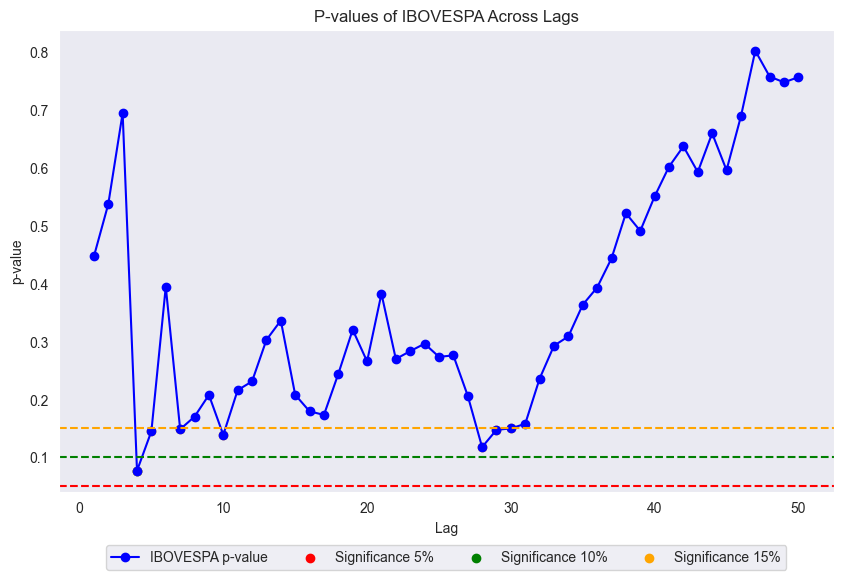

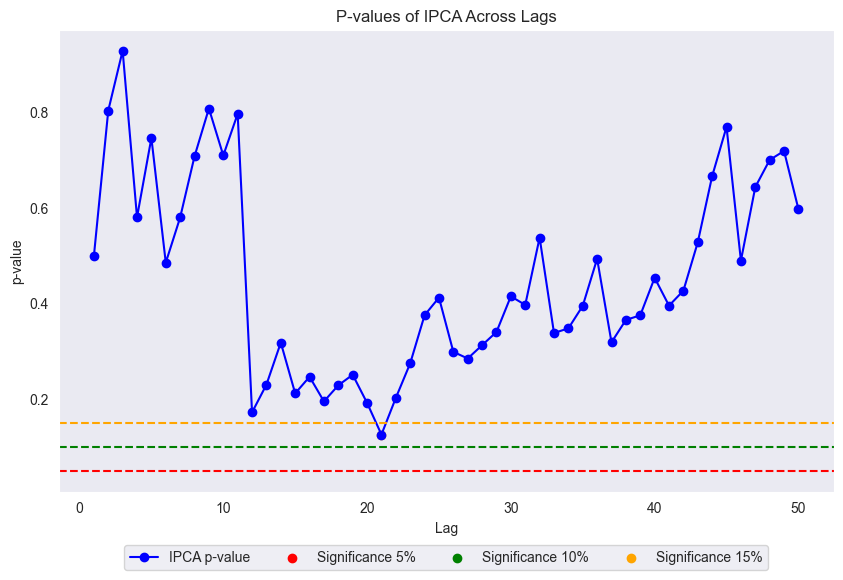

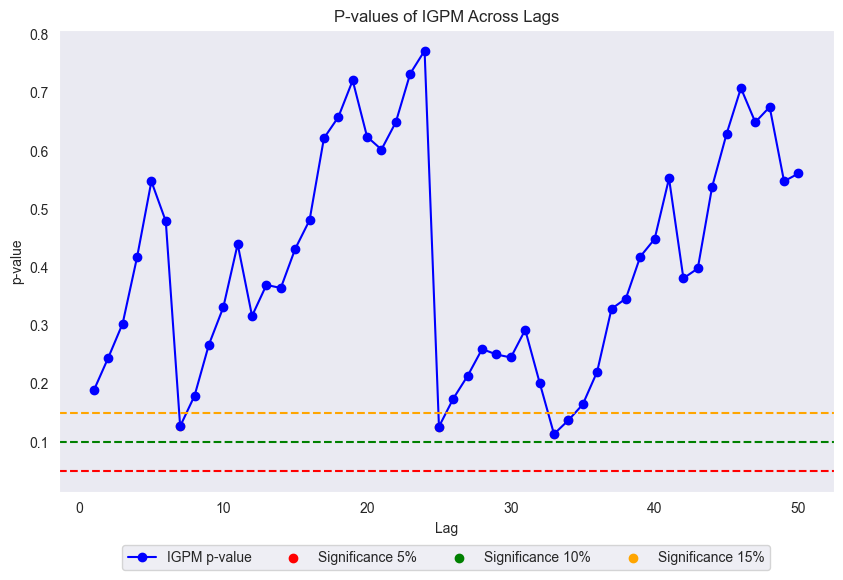

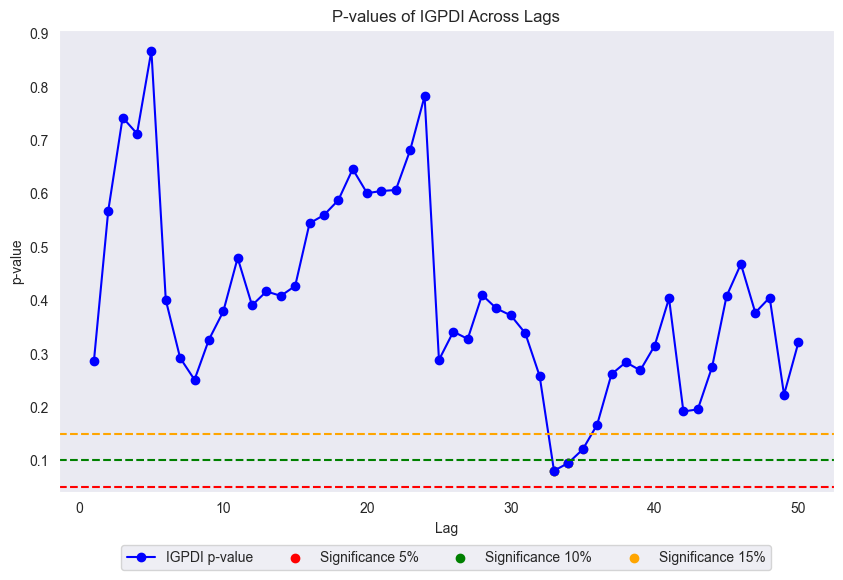

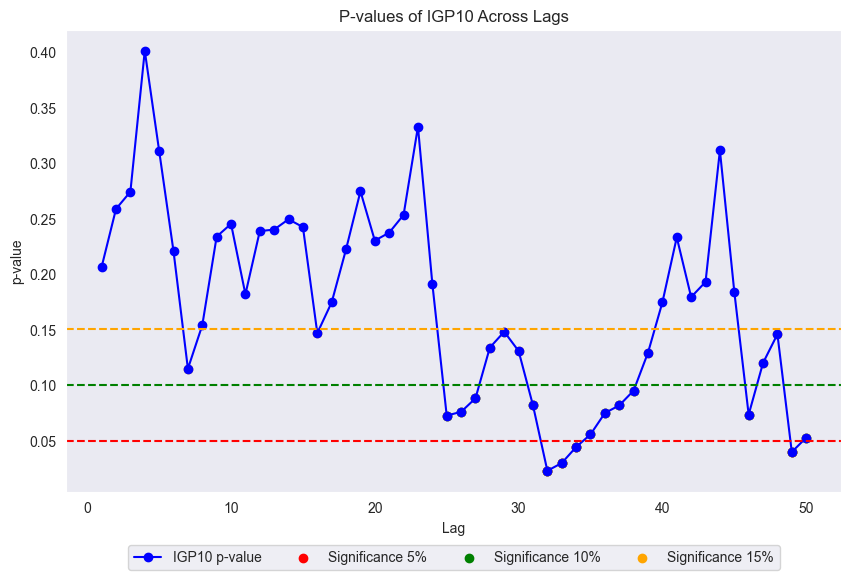

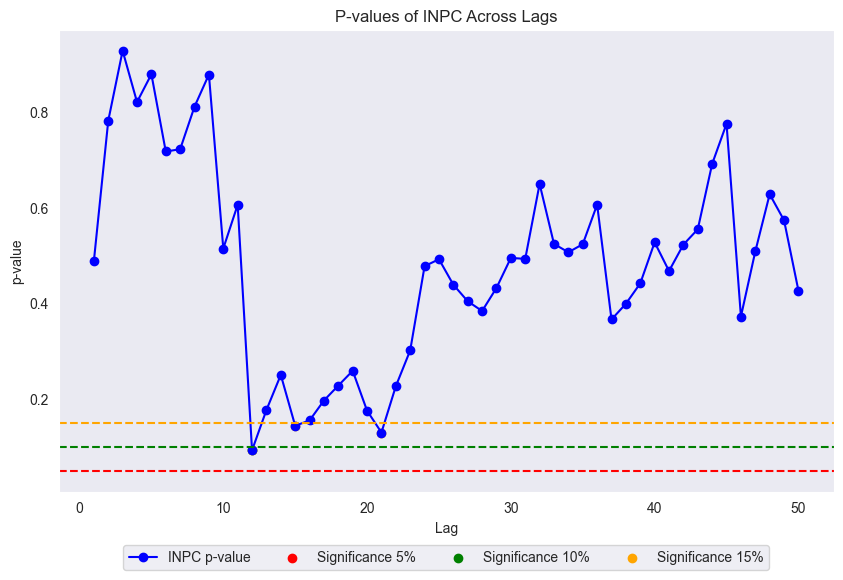

In [10]:
import matplotlib.pyplot as plt

# Generate specific plots for each variable
for column, test_result in result.items():
    plt.figure(figsize=(10, 6))

    # Extract and plot p-values for all lags
    p_values = [test_result[lag][0]['ssr_ftest'][1] for lag in range(1, 51)]
    plt.plot(range(1, 51), p_values, marker='o', label=f'{column} p-value', color='blue')

    # Mark significant lags for alpha levels 0.05, 0.1, 0.15
    for alpha, color, label in zip([0.05, 0.1, 0.15], ['red', 'green', 'orange'],
                                   ['Significance 5%', 'Significance 10%', 'Significance 15%']):
        significant_lags = [lag for lag in range(1, 51) if test_result[lag][0]['ssr_ftest'][1] < alpha]
        plt.scatter(significant_lags, [p_values[lag-1] for lag in significant_lags],
                    color=color, label=label)

    # Add horizontal lines for alpha levels
    plt.axhline(y=0.05, color='red', linestyle='--')
    plt.axhline(y=0.1, color='green', linestyle='--')
    plt.axhline(y=0.15, color='orange', linestyle='--')

    # Finalize the plot
    plt.title(f'P-values of {column} Across Lags')
    plt.xlabel('Lag')
    plt.ylabel('p-value')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)
    plt.grid()
    plt.show()

In [12]:
max_lags_to_test = [30, 40, 58]
results_by_max_lags = {}

for max_lag in max_lags_to_test:
    results_temp = {}
    for column in df.columns:
        if column != 'Dolar':
            results_temp[column] = grangercausalitytests(df[['Dolar', column]], maxlag=max_lag, verbose=False)
    results_by_max_lags[max_lag] = results_temp

# Consolidate results for visualization
summary_by_max_lags = []

for max_lag, results in results_by_max_lags.items():
    for column, test_result in results.items():
        for lag in range(1, max_lag + 1):
            p_value = test_result[lag][0]['ssr_ftest'][1]
            summary_by_max_lags.append({"Max_Lags": max_lag, "Variable": column, "Lag": lag, "p_value": p_value})

lag_comparison_df = pd.DataFrame(summary_by_max_lags)

lag_comparison_df

D:\anaconda3\envs\tcc\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
D:\anaconda3\envs\tcc\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
D:\anaconda3\envs\tcc\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
D:\anaconda3\envs\tcc\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
D:\anaconda3\envs\tcc\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
D:\anaconda3\envs\tcc\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print resul

,Max_Lags,Variable,Lag,p_value
0,30,IBOVESPA,1,0.447171
1,30,IBOVESPA,2,0.537570
2,30,IBOVESPA,3,0.694962
3,30,IBOVESPA,4,0.076787
4,30,IBOVESPA,5,0.145097
...,...,...,...,...
763,58,INPC,54,0.308353
764,58,INPC,55,0.377220
765,58,INPC,56,0.220775
766,58,INPC,57,0.399312


In [23]:
# Divide dataset into different time intervals for analysis
intervals = {
    "2010-2019": df.loc['fev/2010':'dez/2015'],
    "2020-2024": df.loc['jan/2020':'dez/2024'],
}

# Perform Granger causality tests for each interval
interval_results = {}

for period, data in intervals.items():
    results_temp = {}
    for column in data.columns:
        if column != 'Dolar':
            results_temp[column] = grangercausalitytests(data[['Dolar', column]], maxlag=12, verbose=False)
    interval_results[period] = results_temp

# Consolidate results for comparison
summary_by_intervals = []

for period, results in interval_results.items():
    for column, test_result in results.items():
        for lag in range(1, 13):
            p_value = test_result[lag][0]['ssr_ftest'][1]
            summary_by_intervals.append({"Period": period, "Variable": column, "Lag": lag, "p_value": p_value})

temporal_comparison_df = pd.DataFrame(summary_by_intervals)

temporal_comparison_df

D:\anaconda3\envs\tcc\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
D:\anaconda3\envs\tcc\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
D:\anaconda3\envs\tcc\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
D:\anaconda3\envs\tcc\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
D:\anaconda3\envs\tcc\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
D:\anaconda3\envs\tcc\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print resul

,Period,Variable,Lag,p_value
0,2010-2019,IBOVESPA,1,0.977070
1,2010-2019,IBOVESPA,2,0.345096
2,2010-2019,IBOVESPA,3,0.346296
3,2010-2019,IBOVESPA,4,0.412043
4,2010-2019,IBOVESPA,5,0.421067
...,...,...,...,...
139,2020-2024,INPC,8,0.568300
140,2020-2024,INPC,9,0.729413
141,2020-2024,INPC,10,0.871919
142,2020-2024,INPC,11,0.756193


In [21]:
import pandas as pd

# Consolidate significant lags for each column and significance level
significance_levels = [0.05, 0.1, 0.15]
detailed_summary = []

for column, test_result in result.items():
    # Collecting significant lags and their respective p-values
    lag_details = {"Variable": column}
    for alpha in significance_levels:
        significant_lags = [
            (lag, test_result[lag][0]['ssr_ftest'][1])
            for lag in range(1, 51)
            if test_result[lag][0]['ssr_ftest'][1] < alpha
        ]
        lag_details[f"Significant_Lags_{int(alpha * 100)}%"] = [lag for lag, _ in significant_lags]

        # Collect the lag with the lowest p-value (most significant)
        if significant_lags:
            min_p_lag, min_p_value = min(significant_lags, key=lambda x: x[1])
            lag_details[f"Min_p_Lag_{int(alpha * 100)}%"] = min_p_lag
            lag_details[f"Min_p_Value_{int(alpha * 100)}%"] = min_p_value
        else:
            lag_details[f"Min_p_Lag_{int(alpha * 100)}%"] = None
            lag_details[f"Min_p_Value_{int(alpha * 100)}%"] = None

    # Analyze consistency of lags at different levels of significance
    consistent_lags = set(lag_details["Significant_Lags_5%"]).intersection(
        lag_details["Significant_Lags_10%"], lag_details["Significant_Lags_15%"]
    )
    lag_details["Consistent_Lags_Across_Significance"] = list(consistent_lags)

    detailed_summary.append(lag_details)

# Create a DataFrame for visualization
summary_df = pd.DataFrame(detailed_summary)

# Display the detailed summary table
summary_df

,Variable,Significant_Lags_5%,Min_p_Lag_5%,Min_p_Value_5%,Significant_Lags_10%,Min_p_Lag_10%,Min_p_Value_10%,Significant_Lags_15%,Min_p_Lag_15%,Min_p_Value_15%,Consistent_Lags_Across_Significance
0,IBOVESPA,[],NaN,NaN,[4],4.0,0.076787,"[4, 5, 7, 10, 28, 29, 30]",4,0.076787,[]
1,IPCA,[],NaN,NaN,[],NaN,NaN,[21],21,0.125595,[]
2,IGPM,[],NaN,NaN,[],NaN,NaN,"[7, 25, 33, 34]",33,0.113052,[]
3,IGPDI,[],NaN,NaN,"[33, 34]",33.0,0.080505,"[33, 34, 35]",33,0.080505,[]
4,IGP10,"[32, 33, 34, 49]",32.0,0.022795,"[25, 26, 27, 31, 32, 33, 34, 35, 36, 37, 38, 4...",32.0,0.022795,"[7, 16, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34...",32,0.022795,"[32, 33, 34, 49]"
5,INPC,[],NaN,NaN,[12],12.0,0.092634,"[12, 15, 21]",12,0.092634,[]
